<a href="https://colab.research.google.com/github/Anidafio/4105_hw3/blob/main/hw3_p5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Use the URL for the raw CSV data
url1 = 'https://raw.githubusercontent.com/Anidafio/4105_hw3/main/cancer.csv'
#url2 = 'https://raw.githubusercontent.com/Anidafio/4105_hw3/main/diabetes.csv'

cancer = pd.read_csv(url1)
#diabetes = pd.read_csv(url2)

def binary_map(x):
    return x.map({'B': 1, 'M': 0})

cancer[['diagnosis']] = cancer[['diagnosis']].apply(binary_map)

cancer.head()
#diabetes.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [172]:
X = cancer.iloc[:, 2:32].values
Y = cancer.iloc[:, 1].values

In [173]:
#split train and validation sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#standard scaler
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# fit a Naive Bayes model to the data
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_pca, Y_train)

GaussianNB()

In [174]:
Y_pred = model.predict(X_test_pca)
print('Y_pred(20) =', Y_pred[0:20])
print('Y_test(20) =', Y_test[0:20])

Y_pred(20) = [0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0]
Y_test(20) = [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0]


In [175]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[42,  5],
       [ 4, 63]])

In [176]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("F1 score:",metrics.f1_score(Y_test, Y_pred))

Accuracy: 0.9210526315789473
Precision: 0.9264705882352942
Recall: 0.9402985074626866
F1 score: 0.9333333333333335


Text(0.5, 427.9555555555555, 'Predicted label')

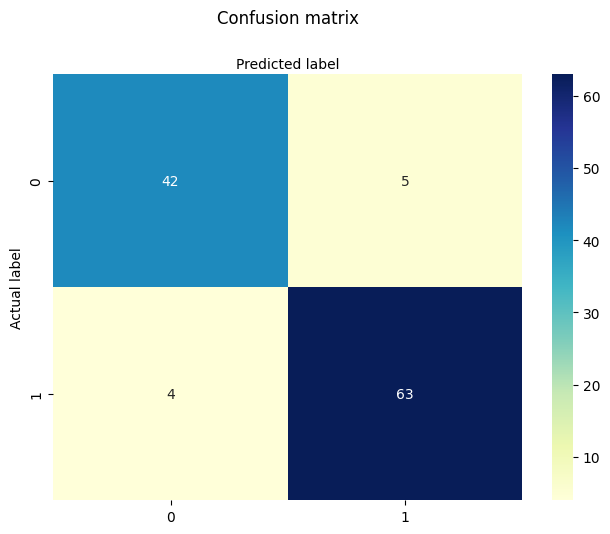

In [177]:
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')